In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 15.7 MB 342 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.

In [ ]:
import math
import numpy as np
import re
import random

from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
#Had to run this to fix load_model


In [ ]:
random.random()

0.5503397902848707

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IF YOU'RE BRIAN RUN THIS BOX
# You will need to update this path to match the folder in your Google Drive
PATH = "/content/drive/MyDrive/ENPH 353/pictures/"
labels_raw = !ls "{PATH}"
!ls "{PATH}"
labels = labels_raw[0].split()
print(labels)

plate_AF80.png	plate_EX18.png	plate_KR81.png	plate_PU15.png	plate_VB61.png
plate_AG74.png	plate_EZ21.png	plate_KZ17.png	plate_PU61.png	plate_VB93.png
plate_AJ35.png	plate_FA11.png	plate_LC27.png	plate_PY77.png	plate_VI70.png
plate_AK53.png	plate_FE17.png	plate_LI60.png	plate_QA23.png	plate_VJ86.png
plate_AL03.png	plate_FI71.png	plate_LJ91.png	plate_QA41.png	plate_VL48.png
plate_AM13.png	plate_FO96.png	plate_LK74.png	plate_QA57.png	plate_VM80.png
plate_AN17.png	plate_FR82.png	plate_LO41.png	plate_QC74.png	plate_VP22.png
plate_AP61.png	plate_FS05.png	plate_LP02.png	plate_QN47.png	plate_VQ39.png
plate_AS95.png	plate_FV24.png	plate_LQ32.png	plate_QO33.png	plate_VQ62.png
plate_AU79.png	plate_FX07.png	plate_LQ77.png	plate_QW86.png	plate_VQ63.png
plate_AW13.png	plate_FY14.png	plate_LT49.png	plate_QX40.png	plate_VR02.png
plate_AW34.png	plate_FZ87.png	plate_LW09.png	plate_QX75.png	plate_VR89.png
plate_AW75.png	plate_GB27.png	plate_LZ61.png	plate_QZ21.png	plate_WC71.png
plate_AZ58.png	plate_GC71

In [ ]:
# IF YOU'RE KENNETH RUN THIS BOX
# You will need to update this path to match the folder in your Google Drive
PATH = "/content/drive/MyDrive/Colab_Notebooks/pictures/training"
labels_raw = !ls "{PATH}"
!ls "{PATH}"
labels = labels_raw[0].split()

In [ ]:
# Put folder of manually labelled data below
MANUAL_LABEL_PATH = "/content/drive/MyDrive/ENPH 353/manual_label_pictures/"
manual_labels_raw = !ls "{MANUAL_LABEL_PATH}"
!ls "{MANUAL_LABEL_PATH}"
labels = manual_labels_raw[0].split()


In [ ]:
files_A = !ls "{PATH}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.

  # Split the string listing sets of 4 files by tab and space and remove any
  # empty splits.
files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]

  # Concatenate all splits into a single sorted list
files = []
for element in files_B:
  files = files + element
files.sort()

# files
print(len(files))

9


In [ ]:
files_A1 = !ls "{MANUAL_LABEL_PATH}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.

  # Split the string listing sets of 4 files by tab and space and remove any
  # empty splits.
files_B1 = [list(filter(None, re.split('\t|\s', files))) for files in files_A1]

  # Concatenate all splits into a single sorted list
files1 = []
for element in files_B1:
  files1 = files1 + element
files1.sort()

# files
print(len(files1))

514


In [ ]:
def char_to_num(char):
  # print(ord(char))
  if ord(char) >= 65 and ord(char) <= 90:
    return ord(char) - 65
  else:
    return ord(char) - 48 + 26

In [ ]:
#from https://colab.research.google.com/drive/16qBcZY-pK9NL0l6hDu0L9fTifOEXOwRw#scrollTo=xddYO2hHTa2m
def make_plate_ugly(input_img):
  #horizontal stretch
  width = int(input_img.shape[1] * random.uniform(1,2.5))
  height = input_img.shape[0]
  dim = (width, height)
  stretch = cv2.resize(input_img, dim, interpolation=cv2.INTER_LINEAR)
  # input_img = cv2.imread(f'{PATH}/{fileName}')
  resize_factor = 0.1
  initial_shape = stretch.shape
  #Need to reverse the order of width and height because PIL format is reversed
  #from cv2 format.
  initial_shape = tuple(reversed(initial_shape[0:2])) + (initial_shape[2],)

  #resize height and width
  small_shape = tuple((np.array(initial_shape[0:2]) * resize_factor).astype(int))

  #scale down and scale back up to introduce rescaling artifacts
  res = cv2.resize(stretch, dsize=small_shape, interpolation=cv2.INTER_LINEAR)
  res = cv2.resize(res, dsize=initial_shape[0:2], interpolation=cv2.INTER_NEAREST)

  #rearrange the color channels so imshow displays the appropriate colors
  # res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

  # plt.imshow(res)
  # plt.show()
  return res

In [ ]:
def make_char_ugly(input_img):
  # input_img = cv2.imread(f'{PATH}/{fileName}')
  #Down + upsizes image from anywhere from 0.2 to 0.4
  resize_factor = 0.75 + 0.15 * random.random()
  initial_shape = input_img.shape
  #Need to reverse the order of width and height because PIL format is reversed
  #from cv2 format.

  #resize height and width
  small_shape = tuple((np.array(initial_shape[0:2]) * resize_factor).astype(int))

  #scale down and scale back up to introduce rescaling artifacts
  res = cv2.resize(input_img, dsize=small_shape, interpolation=cv2.INTER_LINEAR)
  res = cv2.resize(res, dsize=initial_shape[0:2], interpolation=cv2.INTER_NEAREST)

  #rearrange the color channels so imshow displays the appropriate colors
  # res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

  # plt.imshow(res)
  # plt.show()
  return res

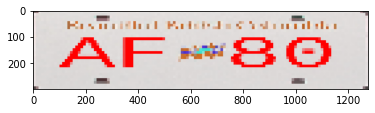

In [ ]:
  input_img = cv2.imread(PATH + "/" + files[0])
  out = make_plate_ugly(input_img)
  plt.imshow(out)

In [ ]:
def ROS_image_cropper(pathName, fileName):
  input_img = cv2.imread(pathName + "/" + fileName)
  #blurify the image
  # plateBlur = cv2.GaussianBlur(input_img,(17,17),50,cv2.BORDER_DEFAULT)
  plateAnalyze = make_plate_ugly(input_img)

  #Convert to HSV and apply filtering
  plateHSV = cv2.cvtColor(plateAnalyze, cv2.COLOR_BGR2HSV) #If reading from fileName, used BGR
  highBlue = (123,255,255)
  lowBlue = (111,174,226)
  plateMask = cv2.inRange(plateHSV, lowBlue, highBlue)
  plateFiltered = cv2.bitwise_and(plateHSV, plateHSV, mask=plateMask)

  #Convert HSV to grayscale and apply thresholding
  plate_RGB = cv2.cvtColor(plateFiltered, cv2.COLOR_HSV2BGR)
  plate_gray = cv2.cvtColor(plate_RGB, cv2.COLOR_BGR2GRAY)
  threshVal = 0
  maxVal = 255
  ret,thresh = cv2.threshold(plate_gray,threshVal,maxVal,cv2.THRESH_BINARY)

  # plt.imshow(thresh)
  # plt.show()

  #Analyze thresholded photo for for level-0 contours
  contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]

  #Sort contours by area
  cntSort = sorted(contours, key=cv2.contourArea, reverse=True)

  #Save the coordinates of each letter
  letters = []
  for i, cnt in enumerate(cntSort[:4]):
    x,y,w,h = cv2.boundingRect(cnt)
    # input_img = cv2.rectangle(input_img, (x,y), (x+w,y+h), (0,255,0), 2)
    letters.append([x,y,w,h])

  if len(letters) != 4:
    print("The file " + fileName + " doesn't have 4 contours")
    return None

  #Sort letters by x-coordinate so we're left-to-right
  sortedLetters = sorted(letters, key=lambda tup:tup[0])

  #Expand each coordinate a little bit so we get the whole letter
  for let in sortedLetters:
    let[0] = max(let[0] - 1, 0)
    let[1] = max(let[1] - 1, 0)
    let[2] = let[2] + 2
    let[3] = let[3] + 2

  #Cutting letters out of original photo using these coordinates
  maxDim = 32
  letterImages = [0,1,2,3]
  for i, let in enumerate(sortedLetters):
    x = let[0]
    y = let[1]
    w = let[2]
    h = let[3]

    #each letter is resized to be a 32x32 image
    letterImages[i] = cv2.resize(plate_gray[y:y+h,x:x+w], (maxDim, maxDim))
    # letterImages[i] = make_char_ugly(letterImages[i])
    # ok,letterImages[i] = cv2.threshold(letterImages[i],threshVal,maxVal,cv2.THRESH_BINARY)

  # Displaying images for diagnosis
  for pic in letterImages:
    cv2_imshow(pic)

  return ([letterImages[0], char_to_num(fileName[6])], [letterImages[1], char_to_num(fileName[7])], [letterImages[2], char_to_num(fileName[8])], [letterImages[3], char_to_num(fileName[9])])

In [ ]:
def ROS_manual_image_cropper(pathName, fileName):
  print(pathName + "/" + fileName)
  input_img = cv2.imread(pathName + "/" + fileName)
  print(input_img.shape)
  gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
  print(gray_img.shape)
  cv2_imshow(gray_img)
  return ([gray_img, char_to_num(fileName[0])],)

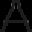

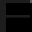

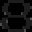

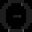

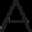

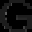

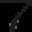

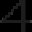

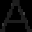

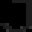

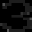

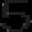

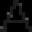

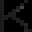

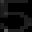

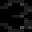

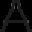

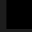

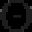

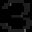

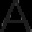

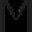

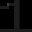

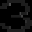

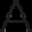

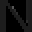

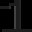

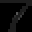

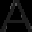

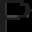

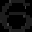

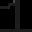

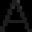

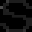

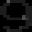

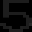

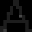

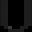

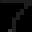

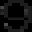

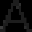

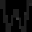

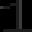

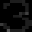

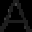

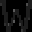

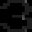

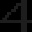

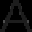

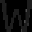

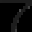

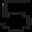

The file plate_AZ58.png doesn't have 4 contours


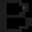

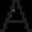

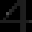

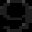

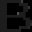

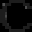

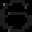

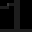

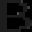

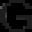

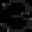

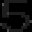

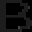

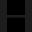

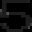

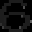

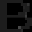

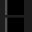

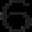

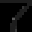

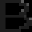

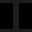

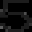

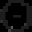

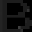

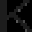

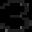

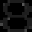

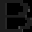

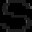

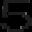

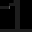

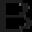

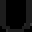

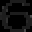

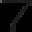

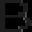

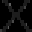

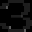

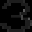

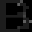

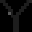

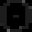

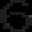

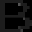

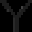

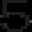

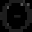

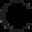

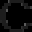

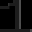

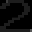

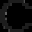

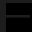

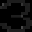

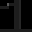

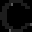

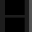

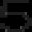

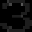

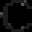

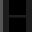

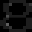

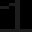

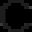

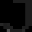

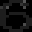

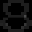

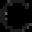

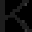

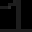

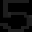

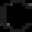

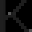

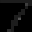

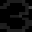

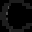

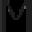

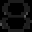

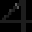

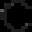

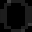

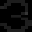

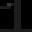

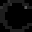

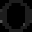

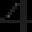

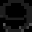

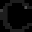

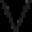

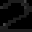

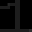

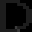

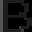

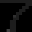

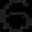

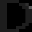

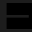

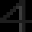

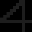

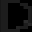

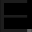

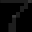

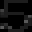

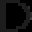

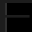

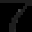

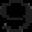

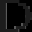

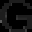

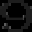

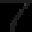

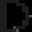

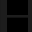

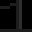

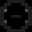

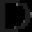

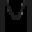

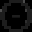

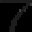

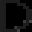

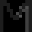

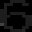

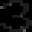

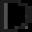

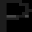

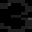

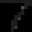

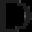

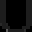

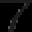

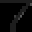

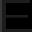

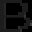

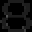

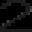

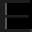

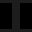

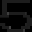

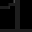

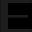

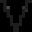

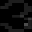

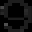

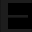

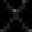

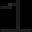

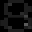

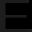

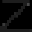

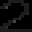

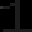

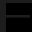

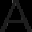

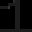

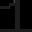

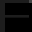

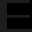

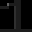

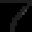

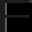

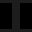

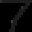

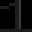

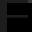

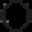

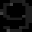

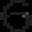

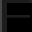

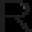

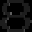

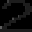

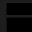

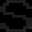

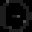

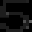

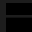

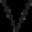

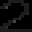

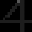

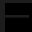

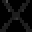

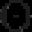

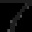

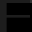

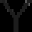

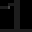

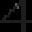

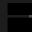

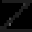

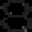

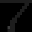

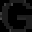

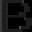

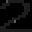

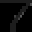

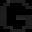

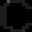

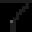

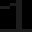

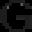

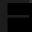

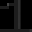

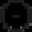

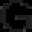

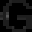

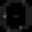

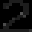

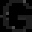

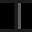

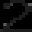

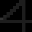

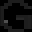

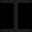

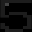

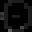

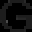

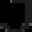

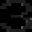

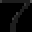

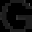

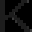

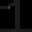

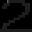

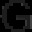

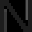

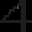

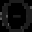

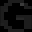

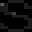

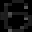

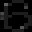

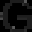

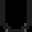

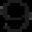

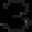

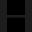

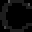

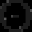

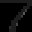

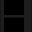

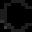

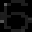

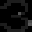

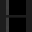

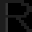

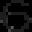

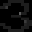

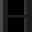

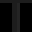

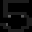

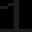

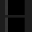

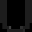

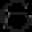

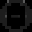

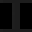

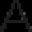

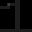

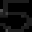

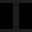

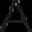

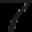

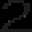

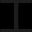

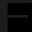

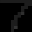

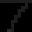

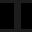

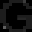

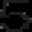

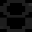

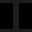

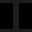

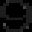

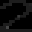

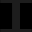

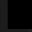

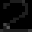

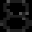

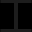

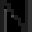

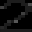

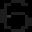

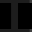

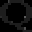

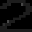

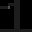

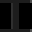

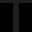

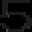

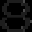

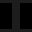

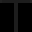

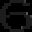

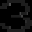

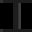

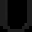

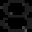

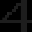

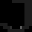

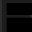

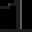

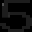

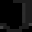

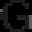

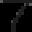

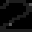

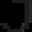

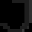

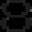

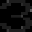

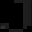

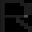

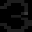

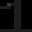

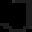

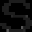

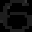

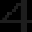

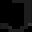

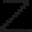

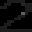

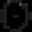

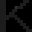

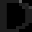

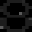

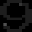

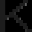

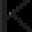

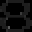

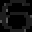

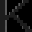

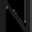

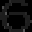

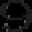

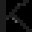

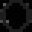

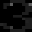

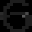

100


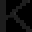

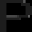

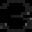

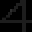

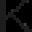

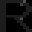

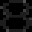

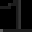

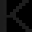

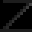

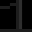

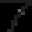

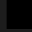

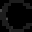

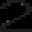

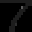

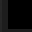

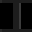

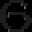

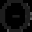

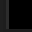

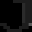

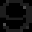

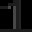

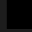

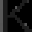

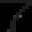

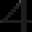

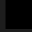

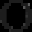

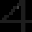

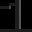

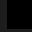

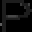

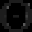

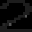

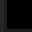

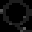

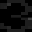

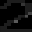

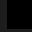

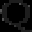

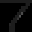

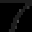

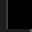

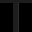

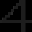

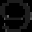

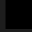

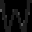

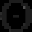

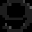

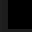

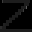

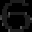

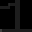

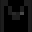

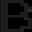

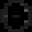

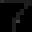

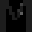

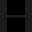

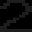

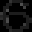

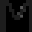

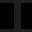

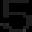

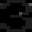

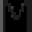

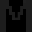

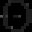

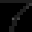

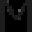

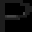

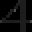

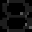

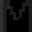

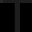

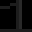

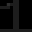

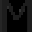

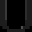

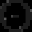

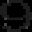

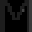

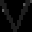

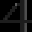

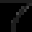

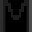

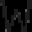

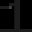

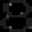

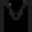

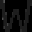

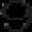

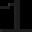

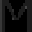

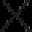

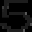

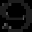

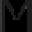

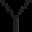

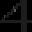

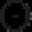

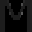

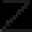

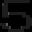

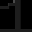

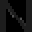

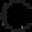

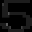

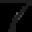

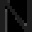

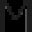

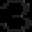

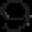

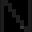

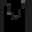

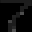

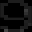

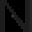

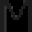

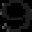

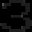

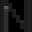

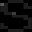

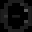

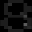

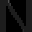

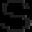

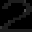

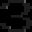

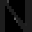

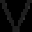

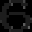

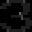

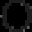

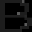

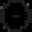

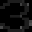

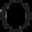

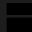

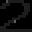

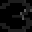

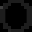

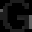

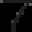

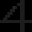

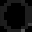

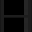

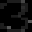

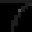

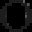

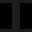

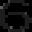

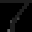

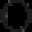

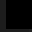

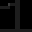

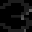

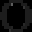

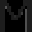

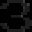

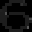

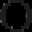

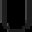

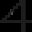

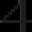

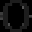

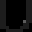

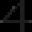

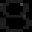

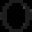

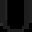

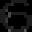

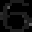

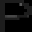

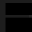

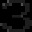

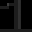

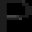

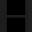

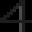

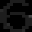

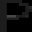

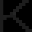

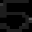

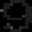

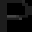

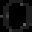

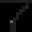

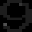

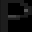

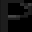

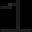

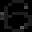

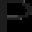

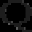

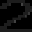

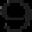

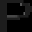

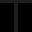

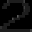

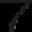

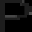

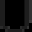

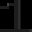

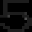

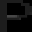

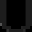

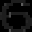

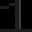

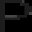

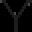

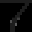

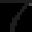

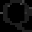

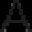

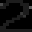

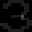

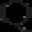

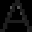

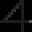

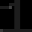

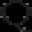

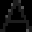

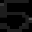

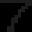

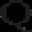

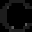

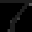

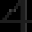

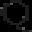

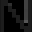

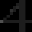

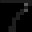

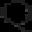

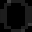

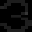

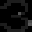

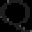

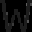

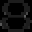

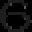

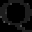

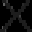

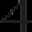

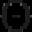

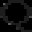

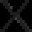

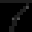

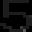

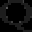

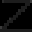

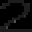

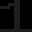

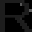

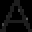

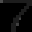

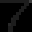

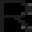

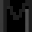

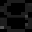

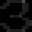

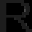

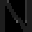

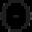

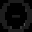

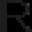

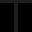

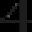

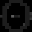

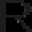

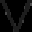

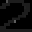

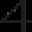

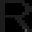

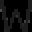

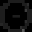

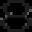

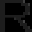

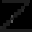

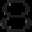

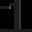

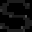

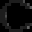

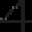

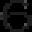

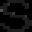

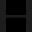

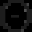

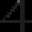

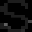

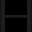

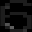

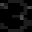

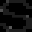

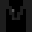

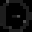

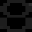

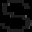

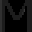

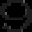

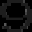

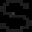

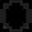

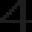

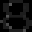

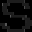

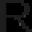

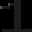

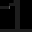

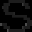

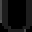

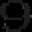

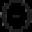

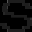

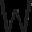

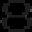

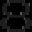

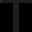

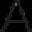

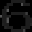

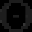

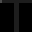

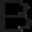

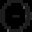

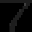

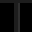

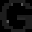

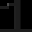

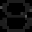

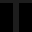

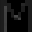

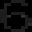

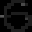

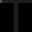

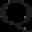

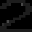

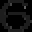

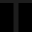

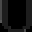

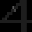

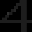

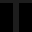

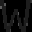

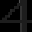

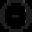

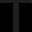

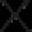

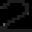

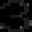

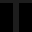

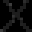

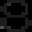

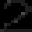

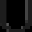

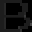

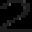

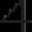

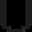

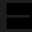

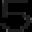

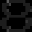

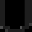

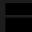

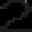

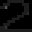

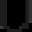

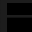

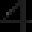

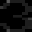

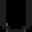

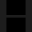

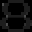

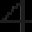

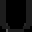

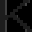

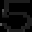

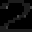

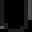

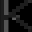

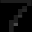

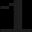

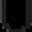

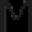

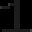

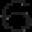

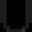

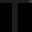

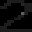

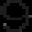

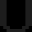

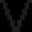

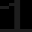

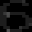

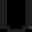

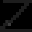

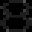

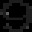

200


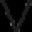

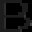

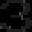

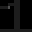

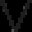

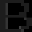

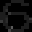

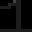

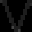

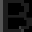

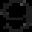

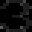

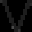

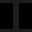

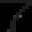

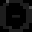

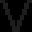

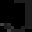

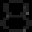

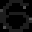

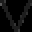

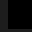

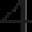

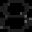

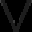

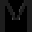

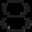

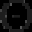

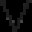

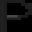

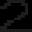

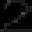

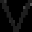

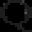

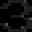

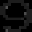

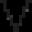

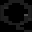

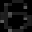

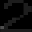

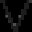

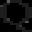

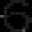

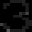

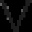

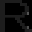

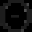

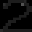

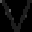

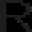

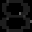

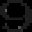

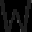

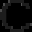

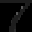

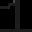

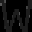

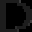

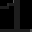

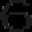

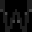

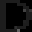

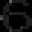

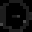

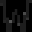

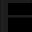

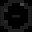

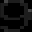

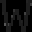

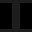

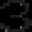

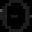

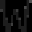

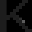

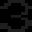

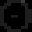

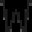

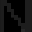

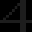

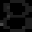

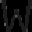

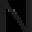

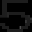

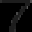

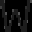

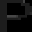

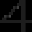

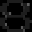

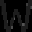

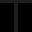

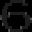

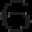

The file plate_WV19.png doesn't have 4 contours


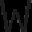

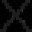

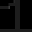

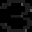

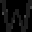

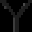

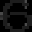

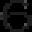

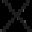

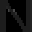

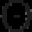

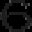

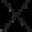

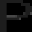

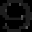

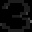

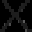

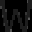

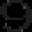

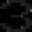

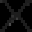

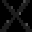

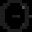

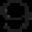

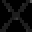

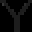

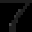

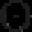

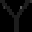

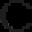

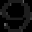

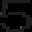

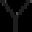

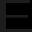

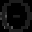

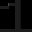

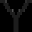

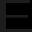

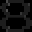

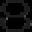

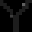

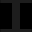

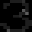

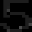

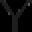

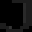

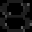

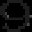

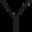

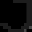

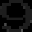

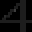

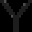

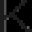

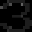

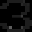

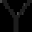

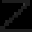

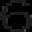

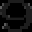

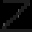

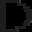

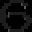

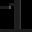

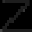

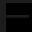

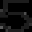

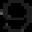

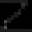

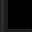

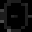

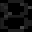

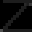

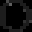

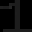

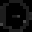

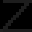

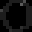

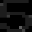

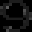

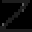

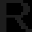

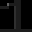

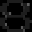

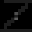

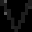

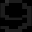

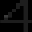

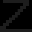

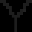

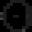

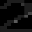

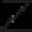

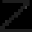

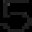

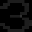

Skips: 2


In [ ]:
def create_imgset(pathName, fileList):
  images = []
  count = 0
  skips = 0
  for i in range(len(fileList)):
    count += 1
    if count % 100 == 0:
      print(count)
    imgs = ROS_image_cropper(pathName, fileList[i])
    if imgs == None:
      skips += 1
      continue
    images += imgs
  print("Skips: " + str(skips))
  return images

imgset = create_imgset(PATH, files)

##Adding our own data from Sim

In [ ]:
print(files1)
print(files)

['01.jpg', '02.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '0_012.jpg', '0_1.jpg', '0_10.jpg', '0_122.jpg', '0_123.jpg', '0_133.jpg', '0_14.jpg', '0_144.jpg', '0_155.jpg', '0_17.jpg', '0_18.jpg', '0_24.jpg', '0_31.jpg', '11.jpg', '12.jpg', '14.jpg', '15.jpg', '19.jpg', '1_1.jpg', '1_11.jpg', '1_1234.jpg', '1_15.jpg', '1_16.jpg', '1_2.jpg', '1_21.jpg', '1_23.jpg', '1_31.jpg', '1_32.jpg', '1_4.jpg', '1_55.jpg', '2_014.jpg', '2_1.jpg', '2_10.jpg', '2_11.jpg', '2_12.jpg', '2_120.jpg', '2_14.jpg', '2_145.jpg', '2_155.jpg', '2_160.jpg', '2_21.jpg', '2_26.jpg', '2_3.jpg', '2_31.jpg', '2_41.jpg', '2_51.jpg', '2_61.jpg', '2_91.jpg', '31.jpg', '34.jpg', '35.jpg', '37.jpg', '3_1.jpg', '3_10.jpg', '3_11.jpg', '3_12.jpg', '3_120.jpg', '3_124.jpg', '3_1456.jpg', '3_15.jpg', '3_170.jpg', '3_1721.jpg', '3_188.jpg', '3_21.jpg', '3_23.jpg', '3_31.jpg', '3_32.jpg', '3_78.jpg', '41.jpg', '42.jpg', '43.jpg', '47.jpg', '49.jpg', '4_1.jpg', '4_11.jpg', '4_123.jpg', '4_1236.jpg', '4_15.jpg', '4_156.jpg', '4

In [ ]:
def create_manual_imgset(pathName, fileList):
  images = []
  for i in range(len(fileList)):
    imgs = ROS_manual_image_cropper(pathName, fileList[i])
    images += imgs
  return images


In [ ]:
manual_imgset = create_manual_imgset(MANUAL_LABEL_PATH, files1)
imgset = manual_imgset

25


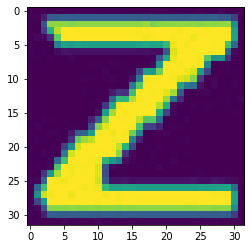

In [ ]:
plt.imshow(imgset[-1][0])
print(imgset[-1][1])

In [ ]:
# Shuffle data set
np.random.shuffle(imgset)

print(imgset[2])

[array([[  0,   2,   0, ...,   0,   0,   0],
       [  0,  20,  61, ...,   0,   1,   1],
       [  0,  46, 154, ...,   0,   0,   1],
       ...,
       [  0,  47, 153, ...,   0,   0,   0],
       [  0,  17,  59, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 5]


In [ ]:
# Genereate X and Y datasets
X_dataset_orig = np.array([data[0] for data in imgset[:]])
Y_dataset_orig = np.array([[data[1]] for data in imgset]).T


## Do One-Hot Encoding

In [ ]:
NUMBER_OF_LABELS = 36
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Normalize X (images) dataset
X_dataset_norm = X_dataset_orig/255.0
# X_dataset = np.squeeze(X_dataset_norm)
X_dataset = np.expand_dims(X_dataset_norm, axis=-1)

# Convert Y dataset to one-hot encoding
Y_dataset = convert_to_one_hot(Y_dataset_orig, NUMBER_OF_LABELS).T

In [ ]:
X_dataset.shape

(514, 32, 32, 1)

In [ ]:
VALIDATION_SPLIT = 0.2

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(X_dataset.shape[0],
             math.ceil(X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(X_dataset.shape))
print("Y shape: " + str(Y_dataset.shape))

Total examples: 514
Training examples: 412
Test examples: 102
X shape: (514, 32, 32, 1)
Y shape: (514, 36)


In [ ]:
from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set.
def displayImage(index):
  plt.imshow(np.squeeze(X_dataset[index], axis=-1))
  caption = ("y = " + str(Y_dataset[index]))#str(np.squeeze(Y_dataset_orig[:, index])))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 20,
           horizontalalignment='left', verticalalignment='top')


interact(displayImage,
         index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
                                    step=1, value=10))
#displayImage(2)

interactive(children=(IntSlider(value=10, description='index', max=313), Output()), _dom_classes=('widget-inte…

<function __main__.displayImage>

## Train Neural Network

In [ ]:
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from tensorflow.keras import losses
import tensorflow as tf

In [ ]:
def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers:
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

In [ ]:
# conv_model = models.Sequential()
# conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                              input_shape=(32, 25, 1)))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2)))
# conv_model.add(layers.Flatten())
# conv_model.add(layers.Dropout(0.5))
# conv_model.add(layers.Dense(512, activation='relu'))
# conv_model.add(layers.Dense(36, activation='softmax'))

In [ ]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(32, 32, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [ ]:
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

In [ ]:
reset_weights(conv_model)

In [ ]:
history_conv = conv_model.fit(X_dataset, Y_dataset,
                              validation_split=VALIDATION_SPLIT,
                              epochs=80,
                              batch_size=16)

Train on 411 samples, validate on 103 samples
Epoch 1/80
411/411 [==============================] - 3s 8ms/sample - loss: 3.4268 - acc: 0.1022 - val_loss: 3.2514 - val_acc: 0.0777
Epoch 2/80
411/411 [==============================] - 0s 538us/sample - loss: 3.1266 - acc: 0.1192 - val_loss: 2.9991 - val_acc: 0.0777
Epoch 3/80
411/411 [==============================] - 0s 543us/sample - loss: 2.8397 - acc: 0.1873 - val_loss: 2.6431 - val_acc: 0.3301
Epoch 4/80
411/411 [==============================] - 0s 537us/sample - loss: 2.5033 - acc: 0.3163 - val_loss: 2.2331 - val_acc: 0.3883
Epoch 5/80
411/411 [==============================] - 0s 546us/sample - loss: 2.0325 - acc: 0.5036 - val_loss: 1.7330 - val_acc: 0.6408
Epoch 6/80
411/411 [==============================] - 0s 531us/sample - loss: 1.5831 - acc: 0.6521 - val_loss: 1.3242 - val_acc: 0.7573
Epoch 7/80
411/411 [==============================] - 0s 527us/sample - loss: 1.1889 - acc: 0.7251 - val_loss: 0.9214 - val_acc: 0.8350
Epoc

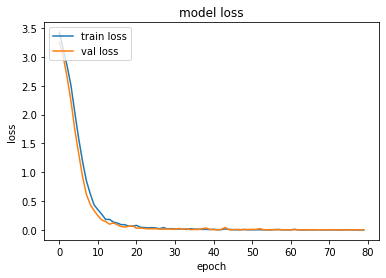

In [ ]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

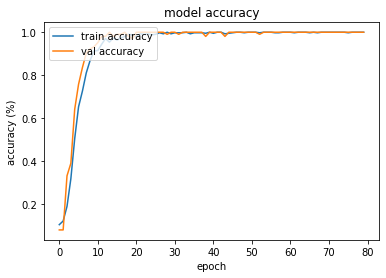

In [ ]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

## Test Model

GND Truth Slider

interactive(children=(IntSlider(value=10, description='index', max=313), Output()), _dom_classes=('widget-inte…

<function __main__.displayImage>

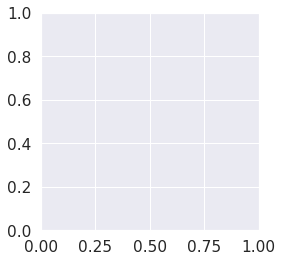

In [ ]:
# Display images in the training data set.
def displayImage(index):
  img = X_dataset[index]
  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]

  # plt.imshow(np.squeeze(img, axis=-1))
  plt.imshow(img)
  caption = ("                  A  |  B  |  C  |  D  |  E  |  F  |  G  |  H  |  I  |  J  |  K  |  L  |  M  |  N  |  O  |  P  |  Q  |  R  |  S  |  T  |  U  |  V  |  W  |  X  |  Y  |  Z  |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9 \n"+
             "GND truth: {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2}\n".
             format(Y_dataset[index][0], Y_dataset[index][1], Y_dataset[index][2], Y_dataset[index][3], Y_dataset[index][4], Y_dataset[index][5], Y_dataset[index][6],
                    Y_dataset[index][7], Y_dataset[index][8], Y_dataset[index][9], Y_dataset[index][10], Y_dataset[index][11], Y_dataset[index][12], Y_dataset[index][13],
                    Y_dataset[index][14], Y_dataset[index][15], Y_dataset[index][16], Y_dataset[index][17], Y_dataset[index][18], Y_dataset[index][19], Y_dataset[index][20],
                    Y_dataset[index][21], Y_dataset[index][22], Y_dataset[index][23], Y_dataset[index][24], Y_dataset[index][25], Y_dataset[index][26], Y_dataset[index][27],
                    Y_dataset[index][28], Y_dataset[index][29], Y_dataset[index][30], Y_dataset[index][31], Y_dataset[index][32], Y_dataset[index][33], Y_dataset[index][34], Y_dataset[index][35]))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 16,
           horizontalalignment='left', verticalalignment='bottom')


interact(displayImage,
        index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
                                   step=1, value=10))
#displayImage(3)

Predicted Values Slider

In [ ]:
# Display images in the training data set.
def displayImage(index):
  img = X_dataset[index]

  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]

  img_squeeze = np.squeeze(img, axis=-1)
  plt.imshow(img_squeeze)
  caption = ("                  A  |  B  |  C  |  D  |  E  |  F  |  G  |  H  |  I  |  J  |  K  |  L  |  M  |  N  |  O  |  P  |  Q  |  R  |  S  |  T  |  U  |  V  |  W  |  X  |  Y  |  Z  |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9 \n"+
             "Predicted: {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2} | {:.2}\n".
             format(y_predict[0],  y_predict[1],  y_predict[2],  y_predict[3],  y_predict[4],  y_predict[5],  y_predict[6],
                     y_predict[7],  y_predict[8],  y_predict[9],  y_predict[10],  y_predict[11],  y_predict[12],  y_predict[13],
                     y_predict[14],  y_predict[15],  y_predict[16],  y_predict[17],  y_predict[18],  y_predict[19],  y_predict[20],
                     y_predict[21],  y_predict[22],  y_predict[23],  y_predict[24],  y_predict[25],  y_predict[26],  y_predict[27],
                     y_predict[28],  y_predict[29],  y_predict[30],  y_predict[31],  y_predict[32],  y_predict[33],  y_predict[34],  y_predict[35]))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 16,
           horizontalalignment='left', verticalalignment='bottom')


interact(displayImage,
        index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
                                   step=1, value=10))
#displayImage(3)

interactive(children=(IntSlider(value=10, description='index', max=313), Output()), _dom_classes=('widget-inte…

<function __main__.displayImage>

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
conv_model.save('saved_model/my_model4')

##Loading Independent sim data

In [ ]:
#IF YOU'RE KENNETH AND TESTING RUN THIS BOX
# Put folder of manually labelled test data below
TEST_MANUAL_LABELS_PATH = "/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set"
test_manual_labels_raw = !ls "{TEST_MANUAL_LABELS_PATH}"
!ls "{TEST_MANUAL_LABELS_PATH}"
labels = test_manual_labels_raw[0].split()

0CCC.jpg      6PWO.jpg	     EPWOWM.jpg      LLLLWLW.jpg    SPSPSODSI.jpg
0HHM.jpg      6PWOSID.jpg    EPWOWP.jpg      LLLSSMLSL.jpg  SPSSP.jpg
0MFMF.jpg     7NNQLQLQ.jpg   EPWPWPWP.jpg    M2MLL.jpg	    T4.jpg
0MMF.jpg      7QOQ.jpg	     EWLKWM.jpg      MEELEL.jpg     TDFG.jpg
1ELELEL.jpg   7WPQP.jpg      F312.jpg	     MMAMAMAM.jpg   TTER.jpg
1FF.jpg       7WPWPW.jpg     FLDSPOS.jpg     MMQPQPO.jpg    TVBV.jpg
1FGL.jpg      839.jpg	     FLRLR.jpg	     N13.jpg	    USUSSPO.jpg
1GF.jpg       840.jpg	     FPSOSI.jpg      NENEEM.jpg     UUSPDFPS.jpg
2MLWL.jpg     841.jpg	     GGGG.jpg	     NQLP.jpg	    UUUAPP.jpg
2PDOID.jpg    8USUPSDPO.jpg  GGPPSOSO.jpg    NQPQPQ.jpg     UUWUWUWU.jpg
2PEPEO.jpg    9ERWE.jpg      GPGPGOGO.jpg    NQQPIO.jpg     V13.jpg
2PSMSMS.jpg   9FKGL.jpg      GPOSDPF.jpg     O3L3L.jpg	    VFLF.jpg
3DPDDPLL.jpg  9FSF.jpg	     GPOSPS.jpg      OCMMAA.jpg     VLLSP.jpg
3FGF.jpg      ALDKMD.jpg     HDDMMX.jpg      OOPRPRP.jpg    VQPQPL.jpg
3LMFM.jpg     ALMKKFL.jpg    HHFPP.j

In [ ]:
test_files_A1 = !ls "{TEST_MANUAL_LABELS_PATH}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.

  # Split the string listing sets of 4 files by tab and space and remove any
  # empty splits.
test_files_B1 = [list(filter(None, re.split('\t|\s', files))) for files in test_files_A1]

  # Concatenate all splits into a single sorted list
test_files1 = []
for element in test_files_B1:
  test_files1 = test_files1 + element
test_files1.sort()

# files
# print(len(test_files1))
print(len(test_files1))

138


In [ ]:
def create_manual_imgset(pathName, fileList):
  images = []
  for i in range(len(fileList)):
    imgs = ROS_manual_image_cropper(pathName, fileList[i])
    images += imgs
  return images


/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/0CCC.jpg
(32, 32, 3)
(32, 32)


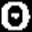

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/0HHM.jpg
(32, 32, 3)
(32, 32)


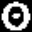

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/0MFMF.jpg
(32, 32, 3)
(32, 32)


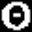

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/0MMF.jpg
(32, 32, 3)
(32, 32)


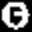

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/1ELELEL.jpg
(32, 32, 3)
(32, 32)


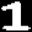

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/1FF.jpg
(32, 32, 3)
(32, 32)


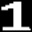

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/1FGL.jpg
(32, 32, 3)
(32, 32)


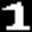

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/1GF.jpg
(32, 32, 3)
(32, 32)


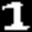

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/2MLWL.jpg
(32, 32, 3)
(32, 32)


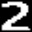

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/2PDOID.jpg
(32, 32, 3)
(32, 32)


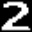

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/2PEPEO.jpg
(32, 32, 3)
(32, 32)


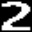

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/2PSMSMS.jpg
(32, 32, 3)
(32, 32)


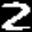

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/3DPDDPLL.jpg
(32, 32, 3)
(32, 32)


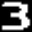

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/3FGF.jpg
(32, 32, 3)
(32, 32)


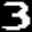

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/3LMFM.jpg
(32, 32, 3)
(32, 32)


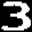

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/3WWLL.jpg
(32, 32, 3)
(32, 32)


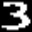

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/412.jpg
(32, 32, 3)
(32, 32)


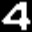

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/413.jpg
(32, 32, 3)
(32, 32)


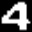

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/4FLLF.jpg
(32, 32, 3)
(32, 32)


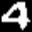

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/4LLLLF.jpg
(32, 32, 3)
(32, 32)


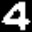

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/4MN.jpg
(32, 32, 3)
(32, 32)


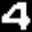

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/513.jpg
(32, 32, 3)
(32, 32)


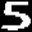

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/5DDDD.jpg
(32, 32, 3)
(32, 32)


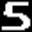

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/5LFLFL.jpg
(32, 32, 3)
(32, 32)


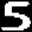

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/5LK.jpg
(32, 32, 3)
(32, 32)


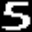

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/5LSLPSL.jpg
(32, 32, 3)
(32, 32)


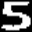

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/6PPEP.jpg
(32, 32, 3)
(32, 32)


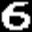

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/6PPOR.jpg
(32, 32, 3)
(32, 32)


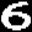

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/6PWO.jpg
(32, 32, 3)
(32, 32)


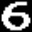

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/6PWOSID.jpg
(32, 32, 3)
(32, 32)


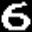

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/7NNQLQLQ.jpg
(32, 32, 3)
(32, 32)


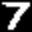

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/7QOQ.jpg
(32, 32, 3)
(32, 32)


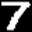

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/7WPQP.jpg
(32, 32, 3)
(32, 32)


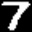

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/7WPWPW.jpg
(32, 32, 3)
(32, 32)


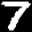

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/839.jpg
(32, 32, 3)
(32, 32)


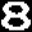

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/840.jpg
(32, 32, 3)
(32, 32)


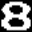

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/841.jpg
(32, 32, 3)
(32, 32)


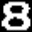

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/8USUPSDPO.jpg
(32, 32, 3)
(32, 32)


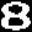

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/9ERWE.jpg
(32, 32, 3)
(32, 32)


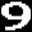

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/9FKGL.jpg
(32, 32, 3)
(32, 32)


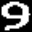

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/9FSF.jpg
(32, 32, 3)
(32, 32)


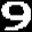

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/ALDKMD.jpg
(32, 32, 3)
(32, 32)


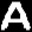

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/ALMKKFL.jpg
(32, 32, 3)
(32, 32)


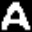

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/AMQQMP.jpg
(32, 32, 3)
(32, 32)


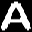

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/B43.jpg
(32, 32, 3)
(32, 32)


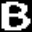

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/B44.jpg
(32, 32, 3)
(32, 32)


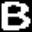

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/B45.jpg
(32, 32, 3)
(32, 32)


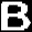

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/CEEE.jpg
(32, 32, 3)
(32, 32)


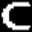

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/CKDDLL.jpg
(32, 32, 3)
(32, 32)


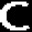

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/CLDLD.jpg
(32, 32, 3)
(32, 32)


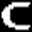

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/CLQQP.jpg
(32, 32, 3)
(32, 32)


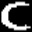

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/D13.jpg
(32, 32, 3)
(32, 32)


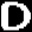

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/DMLWMW.jpg
(32, 32, 3)
(32, 32)


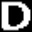

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/DMMFM.jpg
(32, 32, 3)
(32, 32)


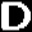

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/DPWPWO.jpg
(32, 32, 3)
(32, 32)


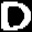

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/EPWMW.jpg
(32, 32, 3)
(32, 32)


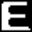

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/EPWOWM.jpg
(32, 32, 3)
(32, 32)


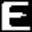

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/EPWOWP.jpg
(32, 32, 3)
(32, 32)


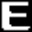

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/EPWPWPWP.jpg
(32, 32, 3)
(32, 32)


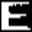

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/EWLKWM.jpg
(32, 32, 3)
(32, 32)


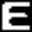

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/F312.jpg
(32, 32, 3)
(32, 32)


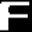

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/FLDSPOS.jpg
(32, 32, 3)
(32, 32)


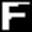

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/FLRLR.jpg
(32, 32, 3)
(32, 32)


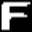

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/FPSOSI.jpg
(32, 32, 3)
(32, 32)


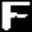

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/GGGG.jpg
(32, 32, 3)
(32, 32)


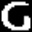

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/GGPPSOSO.jpg
(32, 32, 3)
(32, 32)


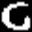

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/GPGPGOGO.jpg
(32, 32, 3)
(32, 32)


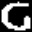

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/GPOSDPF.jpg
(32, 32, 3)
(32, 32)


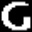

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/GPOSPS.jpg
(32, 32, 3)
(32, 32)


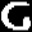

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/HDDMMX.jpg
(32, 32, 3)
(32, 32)


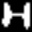

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/HHFPP.jpg
(32, 32, 3)
(32, 32)


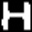

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/HMGMG.jpg
(32, 32, 3)
(32, 32)


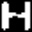

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/HMMF.jpg
(32, 32, 3)
(32, 32)


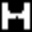

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/HQQPQP.jpg
(32, 32, 3)
(32, 32)


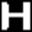

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/I123.jpg
(32, 32, 3)
(32, 32)


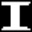

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/IFF.jpg
(32, 32, 3)
(32, 32)


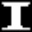

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/IGLGL.jpg
(32, 32, 3)
(32, 32)


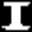

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/IIWIWOW.jpg
(32, 32, 3)
(32, 32)


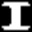

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/JFPPQPQO.jpg
(32, 32, 3)
(32, 32)


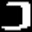

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/JQLQ.jpg
(32, 32, 3)
(32, 32)


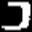

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/K10.jpg
(32, 32, 3)
(32, 32)


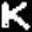

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/KIO.jpg
(32, 32, 3)
(32, 32)


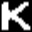

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/KLL.jpg
(32, 32, 3)
(32, 32)


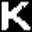

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/LAMDFASDFM.jpg
(32, 32, 3)
(32, 32)


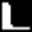

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/LLLLWLW.jpg
(32, 32, 3)
(32, 32)


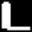

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/LLLSSMLSL.jpg
(32, 32, 3)
(32, 32)


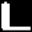

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/M2MLL.jpg
(32, 32, 3)
(32, 32)


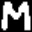

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/MEELEL.jpg
(32, 32, 3)
(32, 32)


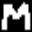

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/MMAMAMAM.jpg
(32, 32, 3)
(32, 32)


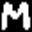

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/MMQPQPO.jpg
(32, 32, 3)
(32, 32)


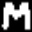

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/N13.jpg
(32, 32, 3)
(32, 32)


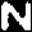

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/NENEEM.jpg
(32, 32, 3)
(32, 32)


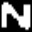

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/NQLP.jpg
(32, 32, 3)
(32, 32)


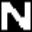

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/NQPQPQ.jpg
(32, 32, 3)
(32, 32)


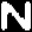

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/NQQPIO.jpg
(32, 32, 3)
(32, 32)


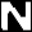

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/O3L3L.jpg
(32, 32, 3)
(32, 32)


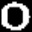

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/OCMMAA.jpg
(32, 32, 3)
(32, 32)


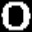

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/OOPRPRP.jpg
(32, 32, 3)
(32, 32)


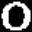

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/OPPAAL.jpg
(32, 32, 3)
(32, 32)


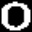

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/PPPEELE.jpg
(32, 32, 3)
(32, 32)


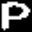

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/PPPP.jpg
(32, 32, 3)
(32, 32)


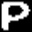

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/PPWPWL.jpg
(32, 32, 3)
(32, 32)


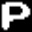

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/QDFG.jpg
(32, 32, 3)
(32, 32)


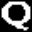

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/QFGLK.jpg
(32, 32, 3)
(32, 32)


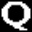

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/QLFLFLFL.jpg
(32, 32, 3)
(32, 32)


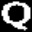

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/QPPOWL.jpg
(32, 32, 3)
(32, 32)


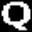

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/RPRPRPOR.jpg
(32, 32, 3)
(32, 32)


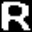

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/RPRPRRP.jpg
(32, 32, 3)
(32, 32)


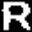

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/RPWOEIFDF.jpg
(32, 32, 3)
(32, 32)


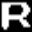

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/RPWOERIS.jpg
(32, 32, 3)
(32, 32)


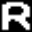

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/SPPPSOS.jpg
(32, 32, 3)
(32, 32)


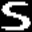

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/SPSODFISP.jpg
(32, 32, 3)
(32, 32)


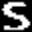

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/SPSPSODSI.jpg
(32, 32, 3)
(32, 32)


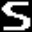

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/SPSSP.jpg
(32, 32, 3)
(32, 32)


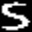

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/T4.jpg
(32, 32, 3)
(32, 32)


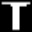

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/TDFG.jpg
(32, 32, 3)
(32, 32)


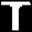

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/TTER.jpg
(32, 32, 3)
(32, 32)


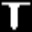

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/TVBV.jpg
(32, 32, 3)
(32, 32)


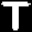

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/USUSSPO.jpg
(32, 32, 3)
(32, 32)


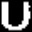

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/UUSPDFPS.jpg
(32, 32, 3)
(32, 32)


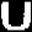

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/UUUAPP.jpg
(32, 32, 3)
(32, 32)


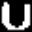

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/UUWUWUWU.jpg
(32, 32, 3)
(32, 32)


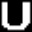

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/V13.jpg
(32, 32, 3)
(32, 32)


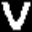

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/VFLF.jpg
(32, 32, 3)
(32, 32)


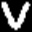

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/VLLSP.jpg
(32, 32, 3)
(32, 32)


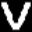

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/VQPQPL.jpg
(32, 32, 3)
(32, 32)


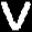

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/W2MLKJH.jpg
(32, 32, 3)
(32, 32)


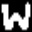

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/WOOOPPIP.jpg
(32, 32, 3)
(32, 32)


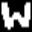

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/WPWOPWI.jpg
(32, 32, 3)
(32, 32)


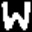

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/WPWPWWPO.jpg
(32, 32, 3)
(32, 32)


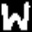

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/XDLDL.jpg
(32, 32, 3)
(32, 32)


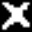

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/XFPFPF.jpg
(32, 32, 3)
(32, 32)


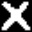

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/XPAAPA.jpg
(32, 32, 3)
(32, 32)


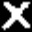

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/Y10.jpg
(32, 32, 3)
(32, 32)


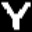

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/Y19.jpg
(32, 32, 3)
(32, 32)


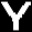

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/ZFGMGM.jpg
(32, 32, 3)
(32, 32)


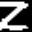

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/ZQLKW.jpg
(32, 32, 3)
(32, 32)


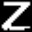

/content/drive/MyDrive/Colab_Notebooks/pictures/competition_testing/test_set/ZSDS.jpg
(32, 32, 3)
(32, 32)


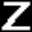

In [ ]:
test_manual_imgset = create_manual_imgset(TEST_MANUAL_LABELS_PATH, test_files1)
test_imgset = test_manual_imgset

21


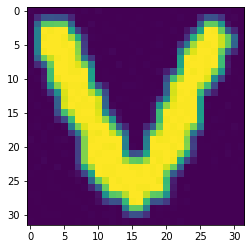

In [ ]:
plt.imshow(test_imgset[-15][0])

In [ ]:
# Shuffle data set
np.random.shuffle(test_imgset)

print(test_imgset[2])

[array([[ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  8,  2,  0],
       [ 1,  0,  0, ..., 26,  0,  0],
       ...,
       [ 1,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  8,  2,  0],
       [ 0,  0,  0, ...,  0,  2,  0]], dtype=uint8), 2]


In [ ]:
# Genereate X and Y datasets
test_X_dataset_orig = np.array([data[0] for data in test_imgset[:]])
test_Y_dataset_orig = np.array([[data[1]] for data in test_imgset]).T

In [ ]:
NUMBER_OF_LABELS = 36
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Normalize X (images) dataset
test_X_dataset_norm = test_X_dataset_orig/255.0
test_X_dataset = np.expand_dims(test_X_dataset_norm, axis=-1)

# Convert Y dataset to one-hot encoding
test_Y_dataset = convert_to_one_hot(test_Y_dataset_orig, NUMBER_OF_LABELS).T

In [ ]:
VALIDATION_SPLIT = 0.2

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(test_X_dataset.shape[0],
             math.ceil(test_X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(test_X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(test_X_dataset.shape))
print("Y shape: " + str(test_Y_dataset.shape))

Total examples: 138
Training examples: 111
Test examples: 27
X shape: (138, 32, 32, 1)
Y shape: (138, 36)


In [ ]:
from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set.
def displayImage(index):
  plt.imshow(np.squeeze(test_X_dataset[index], axis=-1))
  caption = ("y = " + str(test_Y_dataset[index]))#str(np.squeeze(Y_dataset_orig[:, index])))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 20,
           horizontalalignment='left', verticalalignment='top')


interact(displayImage,
         index=ipywidgets.IntSlider(min=0, max=test_X_dataset_orig.shape[0],
                                    step=1, value=10))
#displayImage(2)

interactive(children=(IntSlider(value=10, description='index', max=138), Output()), _dom_classes=('widget-inte…

<function __main__.displayImage>

In [ ]:
%tensorflow_version 1.14.0
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from tensorflow.keras import losses
import tensorflow as tf

In [ ]:
conv_model = models.load_model('drive/MyDrive/Colab_Notebooks/my_model4')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


##Loading in Independent Test Data

In [ ]:
#Loading in untrained test data
# IF YOU'RE KENNETH RUN THIS BOX
# You will need to update this path to match the folder in your Google Drive
TESTPATH = "/content/drive/MyDrive/Colab_Notebooks/pictures/testing"
labels_raw = !ls "{TESTPATH}"
!ls "{TESTPATH}"
testlabels = labels_raw[0].split()

plate_AA37.png	plate_EH02.png	plate_JU45.png	plate_OF02.png	plate_UL46.png
plate_AH04.png	plate_EN12.png	plate_JV12.png	plate_OG97.png	plate_US83.png
plate_AH10.png	plate_EN41.png	plate_JV18.png	plate_OK21.png	plate_UU21.png
plate_AH99.png	plate_EQ70.png	plate_JW76.png	plate_ON55.png	plate_UU77.png
plate_AJ83.png	plate_EW14.png	plate_JZ82.png	plate_OR16.png	plate_UV91.png
plate_AK87.png	plate_EW28.png	plate_KA46.png	plate_OY28.png	plate_VB62.png
plate_AO57.png	plate_FA42.png	plate_KD60.png	plate_PD34.png	plate_VC60.png
plate_AT46.png	plate_FF88.png	plate_KY79.png	plate_PE07.png	plate_VF43.png
plate_AV68.png	plate_FN32.png	plate_KZ60.png	plate_PF94.png	plate_VI86.png
plate_AY92.png	plate_FR19.png	plate_LA27.png	plate_PH56.png	plate_VW57.png
plate_BC72.png	plate_FZ18.png	plate_LA57.png	plate_PI14.png	plate_VX96.png
plate_BD14.png	plate_GC37.png	plate_LA75.png	plate_PO39.png	plate_VY72.png
plate_BE83.png	plate_GD82.png	plate_LB10.png	plate_PX96.png	plate_VY90.png
plate_BF75.png	plate_GG04

In [ ]:
files_A = !ls "{TESTPATH}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.

  # Split the string listing sets of 4 files by tab and space and remove any
  # empty splits.
files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]

  # Concatenate all splits into a single sorted list
test_files = []
for element in files_B:
  test_files = test_files + element
test_files.sort()

# files
print(len(test_files))

223


In [ ]:
test_imgset = create_imgset(TESTPATH, test_files)


100
200
Skips: 0


In [ ]:
np.random.shuffle(test_imgset)

In [ ]:
# Genereate X and Y datasets
test_X_dataset_orig = np.array([data[0] for data in test_imgset[:]])
test_Y_dataset_orig = np.array([[data[1]] for data in test_imgset]).T

In [ ]:
NUMBER_OF_LABELS = 36
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Normalize X (images) dataset
test_X_dataset_norm = test_X_dataset_orig/255.0
test_X_dataset = np.expand_dims(test_X_dataset_norm, axis=-1)

# Convert Y dataset to one-hot encoding
test_Y_dataset = convert_to_one_hot(test_Y_dataset_orig, NUMBER_OF_LABELS).T

In [ ]:
VALIDATION_SPLIT = 0.2

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(test_X_dataset.shape[0],
             math.ceil(test_X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(test_X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(test_X_dataset.shape))
print("Y shape: " + str(test_Y_dataset.shape))

Total examples: 892
Training examples: 714
Test examples: 178
X shape: (892, 32, 32, 1)
Y shape: (892, 36)


In [ ]:
from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set.
def displayImage(index):
  plt.imshow(np.squeeze(test_X_dataset[index], axis=-1))
  caption = ("y = " + str(test_Y_dataset[index]))#str(np.squeeze(Y_dataset_orig[:, index])))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 20,
           horizontalalignment='left', verticalalignment='top')


interact(displayImage,
         index=ipywidgets.IntSlider(min=0, max=test_X_dataset_orig.shape[0],
                                    step=1, value=10))
#displayImage(2)

interactive(children=(IntSlider(value=10, description='index', max=892), Output()), _dom_classes=('widget-inte…

<function __main__.displayImage>

In [ ]:
!ls drive/MyDrive/Colab_Notebooks

 353_ML_Drive			 'Lab 5.ipynb'	 Python_ML_Tools_ENPH353.ipynb
 ENPH253_CrossCorrelation.ipynb   my_model2
 Lab2_submission.ipynb		  pictures


In [ ]:
#Had to run this to fix load_model
pip install 'h5py==2.10.0' --force-reinstall

SyntaxError: ignored

In [ ]:
#Loading in a saved model
conv_model = models.load_model('drive/MyDrive/Colab_Notebooks/my_model2')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Confusion Matrix

In [ ]:
def num_to_char(num):
    if num <= 25:
        return chr(ord('A')+num)
    else:
        return chr(ord('0')+num-26)

vecs = []
for i in range(5):
  vecs += num_to_char(i)

print(vecs)

['A', 'B', 'C', 'D', 'E']


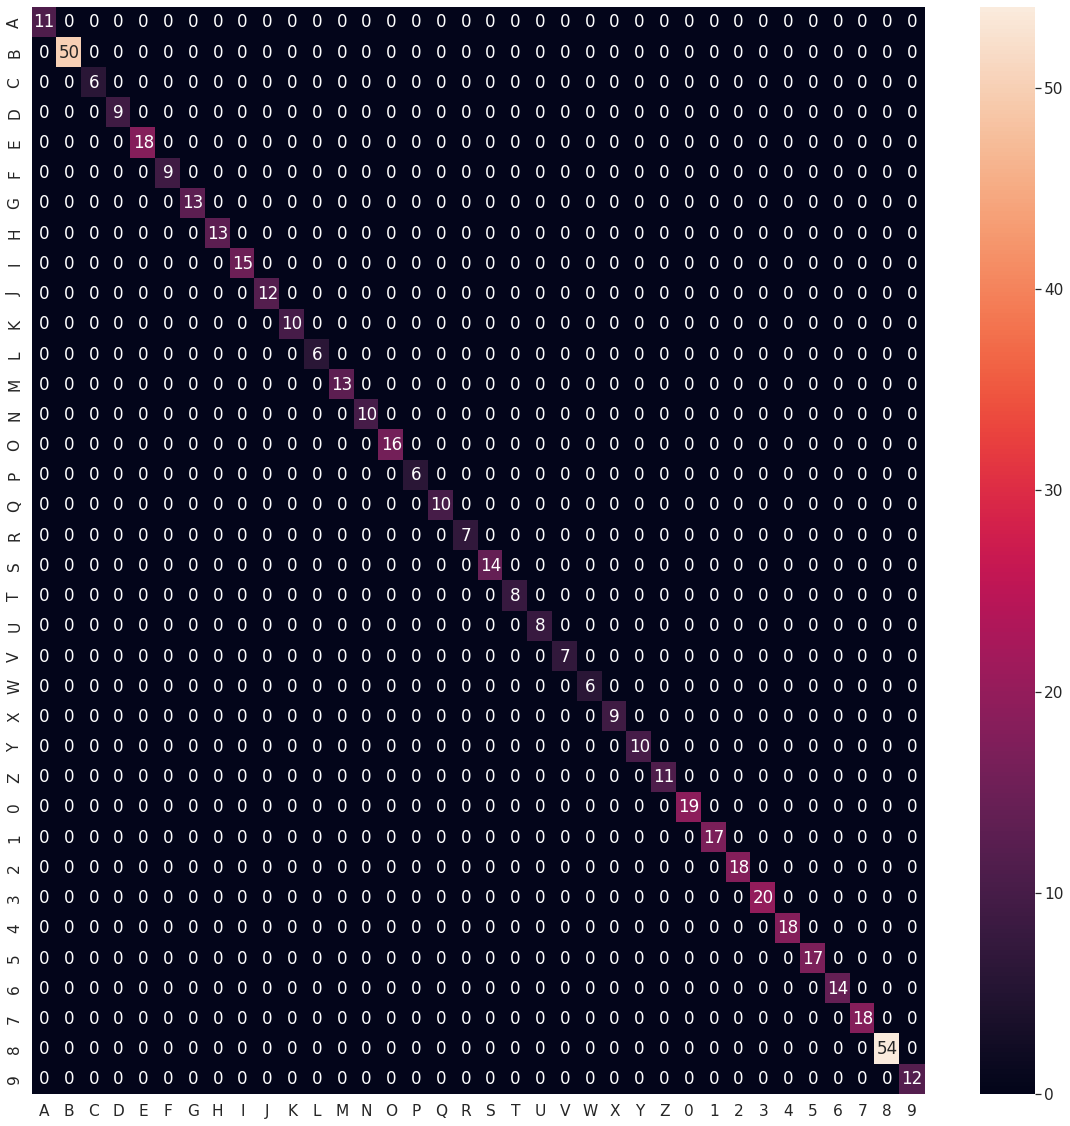

In [ ]:
#On original data
y_pred = conv_model.predict(X_dataset)
y_predict = np.argmax(y_pred, axis=1)
y_test = np.argmax(Y_dataset, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

vecLabels = []
for i in range(36):
  vecLabels += num_to_char(i)

matrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(matrix, vecLabels, vecLabels)
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True)

plt.show()

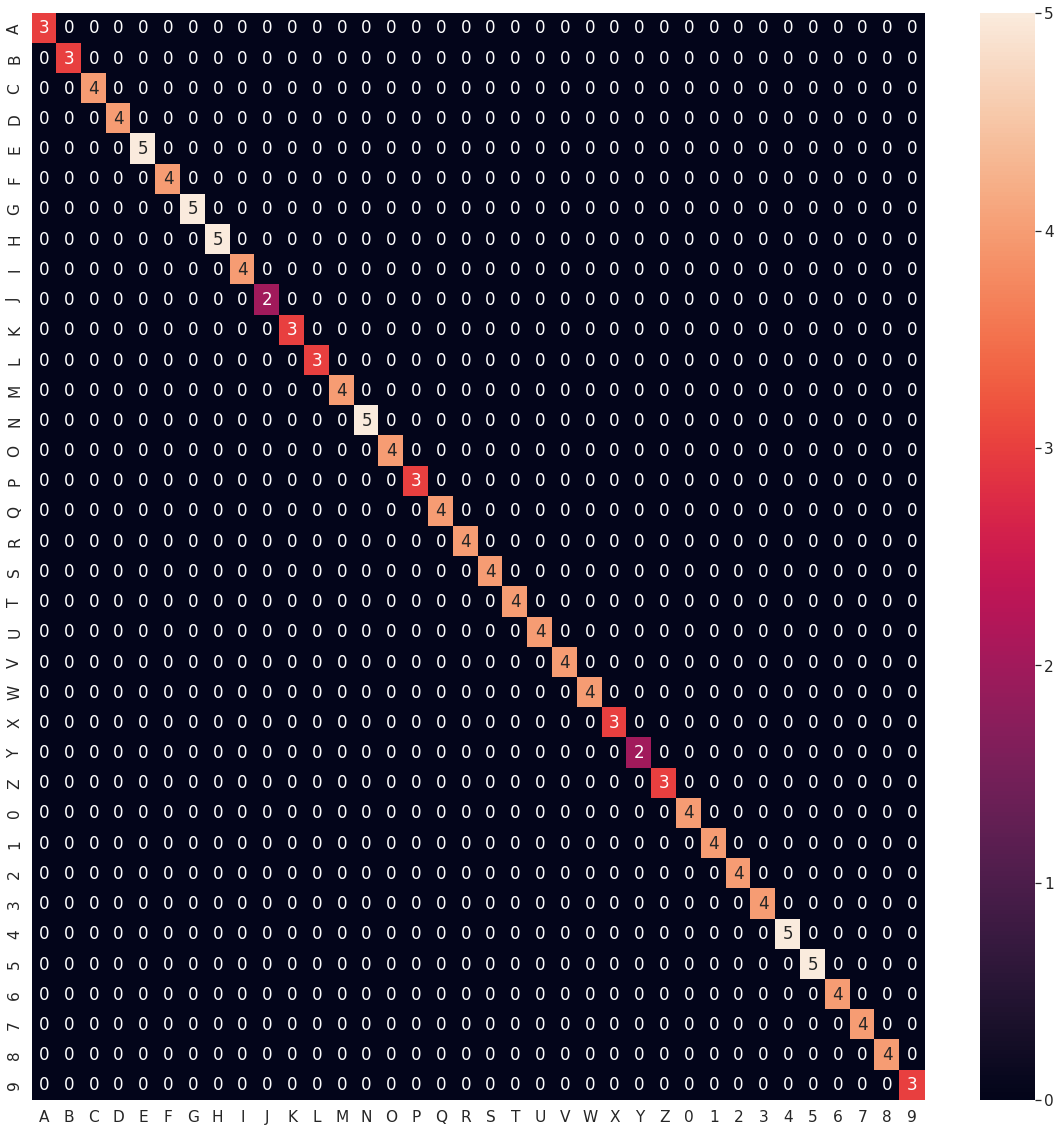

In [ ]:
#On new test data
test_y_pred = conv_model.predict(test_X_dataset)
test_y_predict = np.argmax(test_y_pred, axis=1)
test_y_test = np.argmax(test_Y_dataset, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

matrix = confusion_matrix(test_y_test, test_y_predict)
vecLabels = []
for i in range(36):
  vecLabels += num_to_char(i)

df_cm = pd.DataFrame(matrix, vecLabels, vecLabels)
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True)

plt.show()

## Top Losses

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction=tf.compat.v1.losses.Reduction.NONE)
loss_values = loss(y_test,y_pred).numpy()
print(loss_values, len(loss_values))

AttributeError: ignored

In [ ]:
def plot_top_losses(actual, pred, k=9, figsize=(10,10)):
  loss_values = loss(actual,pred).numpy()
  top_k = loss_values.argsort()[-k:][::-1]
  cols = math.ceil(math.sqrt(k))
  rows = math.ceil(k/cols)
  fig,axes = plt.subplots(rows, cols, figsize=figsize)
  fig.suptitle('Prediction/Actual/Loss/Prediction_Probability', weight='bold', size=14)
  i = 0
  for index in top_k:
    image = test_images[index]
    actual = test_labels[index]
    loss_value = loss_values[index]
    predicted = np.argmax(pred[index])
    prob = pred[index][predicted]
    title = f'{predicted}/{actual}/{loss_value:.2f}/{prob:.2f}'
    ax = axes.flat[i]
    i+=1
    image = np.squeeze(image,axis=2)
    ax.imshow(image)
    ax.set_title(title)

In [ ]:
#adapted from https://github.com/tulasiram58827/plot_top_losses_keras/blob/master/Plot_Top_Losses_Keras_wandb.ipynb
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True,reduction=tf.compat.v1.losses.Reduction.NONE)

def plot_top_losses(actual, pred, k=9, figsize=(10,10)):
  loss_values = loss(actual,pred).numpy()
  print(len(loss_values))
  top_k = loss_values.argsort()[-k:][::-1]
  cols = math.ceil(math.sqrt(k))
  rows = math.ceil(k/cols)
  fig,axes = plt.subplots(rows, cols, figsize=figsize)
  fig.suptitle('Prediction/Actual/Loss/Prediction_Probability', weight='bold', size=14)
  i =0
  for index in top_k:
    image = X_dataset[index]
    actual = np.argmax(y_test[index])
    loss_value = loss_values[index]
    predicted = np.argmax(pred[index])
    prob = pred[index][predicted]
    title = f'{predicted}/{actual}/{loss_value:.2f}/{prob:.2f}'
    ax = axes.flat[i]
    i+=1
    image = np.squeeze(image,axis=-1)
    ax.imshow(image)
    ax.set_title(title)

plot_top_losses(Y_dataset, y_pred, k=9)

AttributeError: ignored